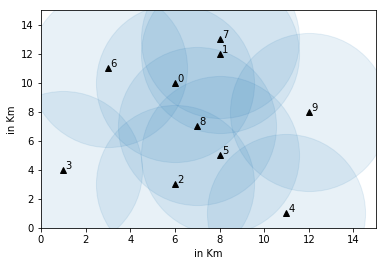

In [17]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../model')

# user made models
import host
import package
import router
import utils

## AREA DESCRIPTION ##

hosts_quantity = 10

# values below corresponds to a measurement in kilometers
width = 15
height = 15

# get arrays containing coordinates
x, y = utils.generate_coordinates(hosts_quantity, width, height)

# static host positions for testing purposes
# x = [1, 5, 6, 9]
# y = [1, 6, 3, 5]

# figure dimensions
plt.axis([0, width, 0, height])

# figure labels
plt.xlabel("in Km")
plt.ylabel("in Km")

# plotting triangles
plt.plot(x, y, 'k^')

# plotting hosts names
for i in range(hosts_quantity):
    plt.annotate(i, (x[i]+0.1, y[i]+0.1))

# plotting estimated area coverage
plt.scatter(x, y, s=25000, alpha=0.1)

# plt.arrow(x[1], y[1], x[2]-x[1], y[2]-y[1])

plt.show()